In [1]:
import pandas as pd
import numpy as np
import scipy
import statistics as st
from statistics import mean
from statistics import median
from statistics import variance
from scipy import stats
from scipy.stats import mstats
import math
import statsmodels.api as sm 

import matplotlib.pyplot as pyplot

from statsmodels.formula.api import ols

In [2]:
crab = pd.read_csv('./crab.csv')

,Unnamed: 0,color,spine,width,satell,weight
0,1,3,3,28.3,8,3.050
1,2,4,3,22.5,0,1.550
2,3,2,1,26.0,9,2.300
3,4,4,3,24.8,0,2.100
4,5,4,3,26.0,4,2.600
...,...,...,...,...,...,...
168,169,4,3,26.1,3,2.750
169,170,4,3,29.0,4,3.275
170,171,2,1,28.0,0,2.625
171,172,5,3,27.0,0,2.625


In [4]:
crab.spine = crab.spine.astype('category')

In [5]:
import matplotlib.pyplot as plt

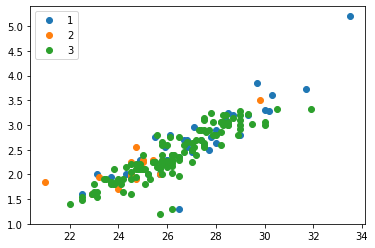

In [6]:
grps = crab.groupby('spine')
for name, grp in grps:
    plt.plot(grp.width, grp.weight, marker = 'o', linestyle = '', label = name)
plt.legend()
plt.show()

In [10]:
n = len(crab.weight)
s1 = np.zeros(n)
s2 = np.zeros(n)
s1[crab.spine == 1] = 1
s2[crab.spine == 2] = 1

In [13]:
model = ols('weight ~ width + s1 + s2', data = crab).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           2.43e-57
Time:                        22:24:24   Log-Likelihood:                -14.124
No. Observations:                 173   AIC:                             36.25
Df Residuals:                     169   BIC:                             48.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9992      0.264    -15.148      0.000      -4.520      -3.478
width          0.2438      0.010     24.335      0.000       0.224       0.264
s1             0.0697      0.051      1.376      0.171      -0.030       0.170
s2             0.1251      0.074      1.684      0.094      -0.022       0.272
==============================================================================
Omnibus:                       47.561   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.961
Skew:                          -0.907   Prob(JB):                     1.41e-49
Kurtosis:                       8.284   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
width,41.788210,1.0,592.185517,4.089090e-57
s1,0.133590,1.0,1.893114,1.706717e-01
s2,0.200214,1.0,2.837256,9.394732e-02
Residual,11.925667,169.0,NaN,NaN


In [16]:
sigma_square = model.scale
sigma_square

0.07056607821402082

In [17]:
model.mse_resid

0.07056607821402082

In [22]:
analysis = model.get_influence()
SR = analysis.resid_studentized_internal
fitted_vals = model.fittedvalues

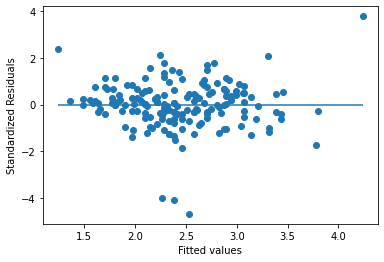

In [24]:
import matplotlib.pyplot as plt
plt.scatter(fitted_vals, SR)
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.hlines(0, xmin = min(fitted_vals), xmax = max(fitted_vals))
plt.show()

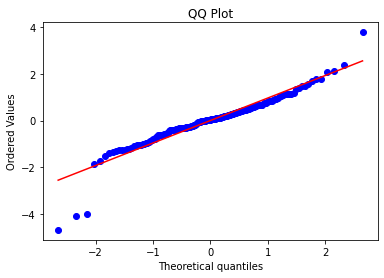

In [27]:
scipy.stats.probplot(SR, dist = 'norm', plot = plt)
plt.title('QQ Plot')
plt.show()

In [30]:
model.predict() == fitted_vals

0      True
1      True
2      True
3      True
4      True
       ... 
168    True
169    True
170    True
171    True
172    True
Length: 173, dtype: bool

In [33]:
n = len(crab.weight)
inter = [1] * n
X = np.column_stack((inter, crab.width, s1, s2))
res = sm.OLS(crab.weight, X).fit()

In [34]:
new_row = [1, 27, 1, 0]
prediction = res.get_prediction(new_row)
prediction.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.652043,0.043686,2.565803,2.738282,2.120593,3.183492
